In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [5]:
(x_train,y_train ),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
type(x_train)

numpy.ndarray

In [7]:
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [11]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

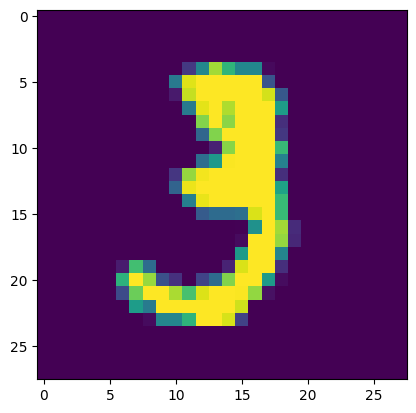

In [13]:
plt.imshow(x_train[10])
plt.show()

In [14]:
print(y_train[10])

3


In [16]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [21]:

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2889 - accuracy: 0.9162
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1353 - accuracy: 0.9594
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0984 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0794 - accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9803
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0551 - accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0487 - accuracy: 0.9844
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0423 - accuracy: 0.9865
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0370 - accuracy: 0.9877
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.033

In [26]:
loss , accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0936 - accuracy: 0.9758
0.9757999777793884


In [27]:
print(x_test.shape)

(10000, 28, 28)


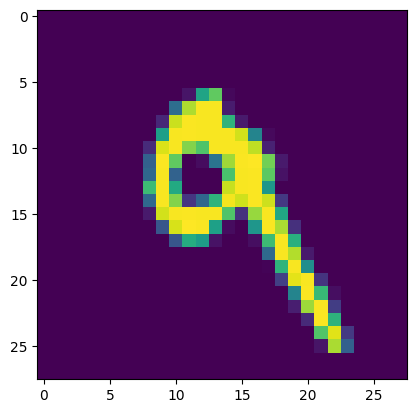

In [30]:
plt.imshow(x_test[7])

In [31]:
print(y_test[7])

9


In [32]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [35]:
print(y_pred[7])
y_pred.shape

[1.8344905e-05 6.2711340e-05 8.5111293e-05 8.1579304e-01 9.9183923e-01
 1.5640264e-02 1.5744797e-10 5.4384112e-01 8.9356990e-06 9.9996251e-01]


(10000, 10)

model.predict() gives the prediction probability of each class for that data point


In [34]:
label_for_text_image = np.argmax(y_pred[7])
print(label_for_text_image)

9


In [38]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

In [39]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

Text(0.5, 47.7222222222222, 'Predicted Labels')

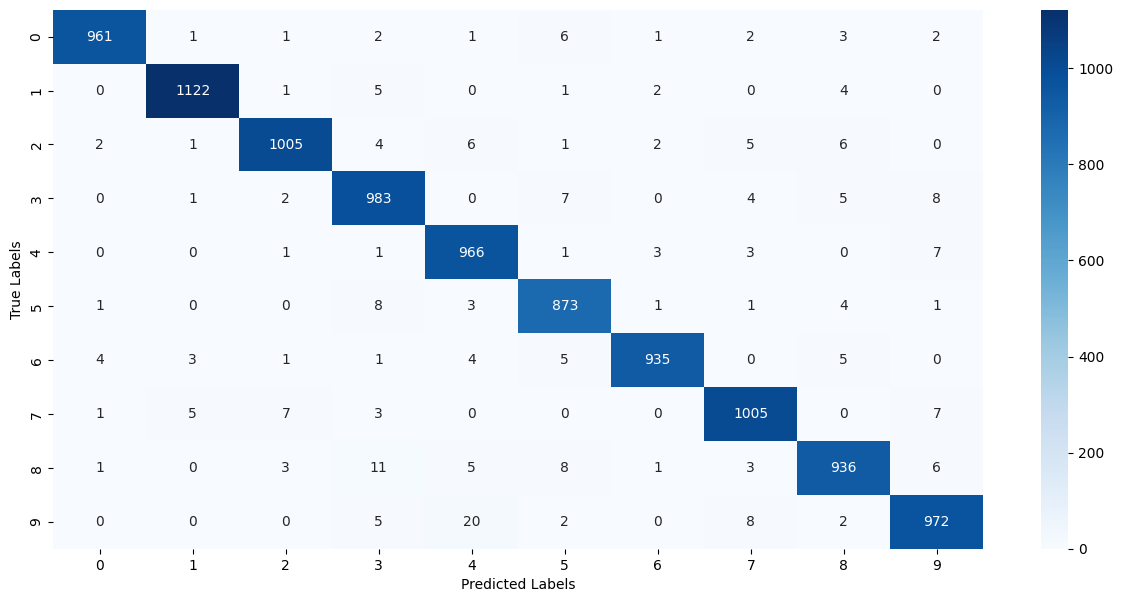

In [40]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [41]:
!wget https://miro.medium.com/v2/resize:fit:451/0*kKxxK1YXSyWMEBtS.PNG

--2024-03-10 20:46:42--  https://miro.medium.com/v2/resize:fit:451/0*kKxxK1YXSyWMEBtS.PNG
Resolving miro.medium.com (miro.medium.com)... 162.159.152.4, 162.159.153.4, 2606:4700:7::a29f:9804, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.152.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2855 (2.8K) [image/png]
Saving to: ‘0*kKxxK1YXSyWMEBtS.PNG’

0*kKxxK1YXSyWMEBtS. 100%[===================>]   2.79K  --.-KB/s    in 0s      

2024-03-10 20:46:43 (27.1 MB/s) - ‘0*kKxxK1YXSyWMEBtS.PNG’ saved [2855/2855]



In [42]:
input_img = cv2.imread('/content/mnist.PNG')


In [43]:
type(input_img)

numpy.ndarray

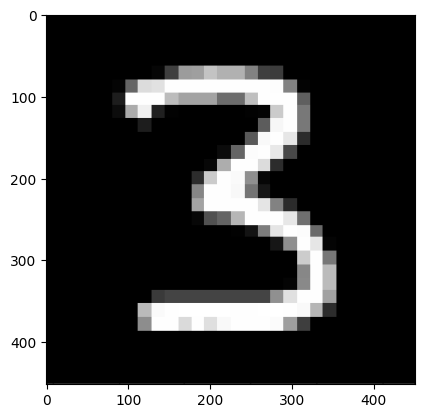

In [44]:
plt.imshow(input_img)

In [45]:
input_img.shape

(452, 451, 3)

In [46]:
gray_img = cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

In [47]:
gray_img.shape

(452, 451)

In [48]:
input_image_resize = cv2.resize(gray_img, (28, 28))

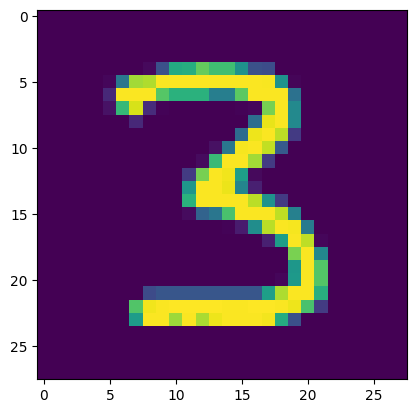

In [49]:
plt.imshow(input_image_resize)

In [51]:
input_image_resize.shape

(28, 28)

In [52]:
input_image_resize = input_image_resize/255

In [53]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [54]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 37ms/step
[[1.05020478e-10 3.63678217e-01 2.62076288e-01 1.00000000e+00
  4.79350282e-10 5.84813416e-01 3.92549373e-16 9.42324768e-05
  9.33081746e-01 1.11795805e-01]]


In [55]:
input_pred_label = np.argmax(input_prediction)

In [56]:
print(input_pred_label)

3
